# Personal Loan Classification in Banking

![image](banking.jpg)

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Data</p> 

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

**Content:** 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Description of features:**
    
1- ID: Customer ID
    
2- Age: Customer's age in completed years
    
3- Experience: years of professional experience
    
4- Income: Annual income of the customer
    
5- ZIP Code: Home Address Zip Code
    
6- Family: Family size of the customer
    
7- CCAvg: Avg. Spending on Credit Card per Month 
    
8- Education: Education Level. (1: Undergrad; 2: Graduate; 3: Advanced / Professional)

9- Mortgage: Value of house mortgage
    
10- Personal Loan: Did this customer accept the personal loan offered in the last campaign? (0: No ;1: Yes)
    
11- Securities Account: Does the customer have a securities account with the bank? (0: No ;1: Yes)
    
12- CD Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No ;1: Yes)
    
13- Online: Does the customer use internet banking facilities? (0: No ;1: Yes)
    
14- Credit card: Does the customer use a credit card issued by this Bank? (0: No ;1: Yes)
    
**Objective:**   
    
The classification goal is to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. We will be using supervised learning methods such as **Logistic Regresssion**, **Naive Bayes Algorigthm**, **K-Nearest Neighbors (KNN)** and **Random Forrest**.

In [1]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E:\Machine Learning\IMT/Bank_Personal_Loan_Modelling.csv')

In [3]:
df = pd.DataFrame(data)
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [5]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column   dtypes  nunique  sum_null
0                   ID    int64     5000         0
1                  Age    int64       45         0
2           Experience    int64       47         0
3               Income    int64      162         0
4             ZIP Code    int64      467         0
5               Family    int64        4         0
6                CCAvg  float64      108         0
7            Education    int64        3         0
8             Mortgage    int64      347         0
9        Personal Loan    int64        2         0
10  Securities Account    int64        2         0
11          CD Account    int64        2         0
12              Online    int64        2         0
13          CreditCard    int64        2         0

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">PreProcessing</p> 

### Data Cleaning

In [6]:
# Turning negetive values into positive
df['Experience']= abs(df['Experience'])

In [7]:
# Duplicated data
df.duplicated().sum()

0

In [8]:
# Drop redundant columns columns from dataset
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df.shape

(5000, 12)

### Exploratory Data Analysis

In [9]:
# Separate numerical and categorical features into different lists first
df_numerical = list(df.loc[:,['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
df_categorical = list(df.loc[:,['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']])

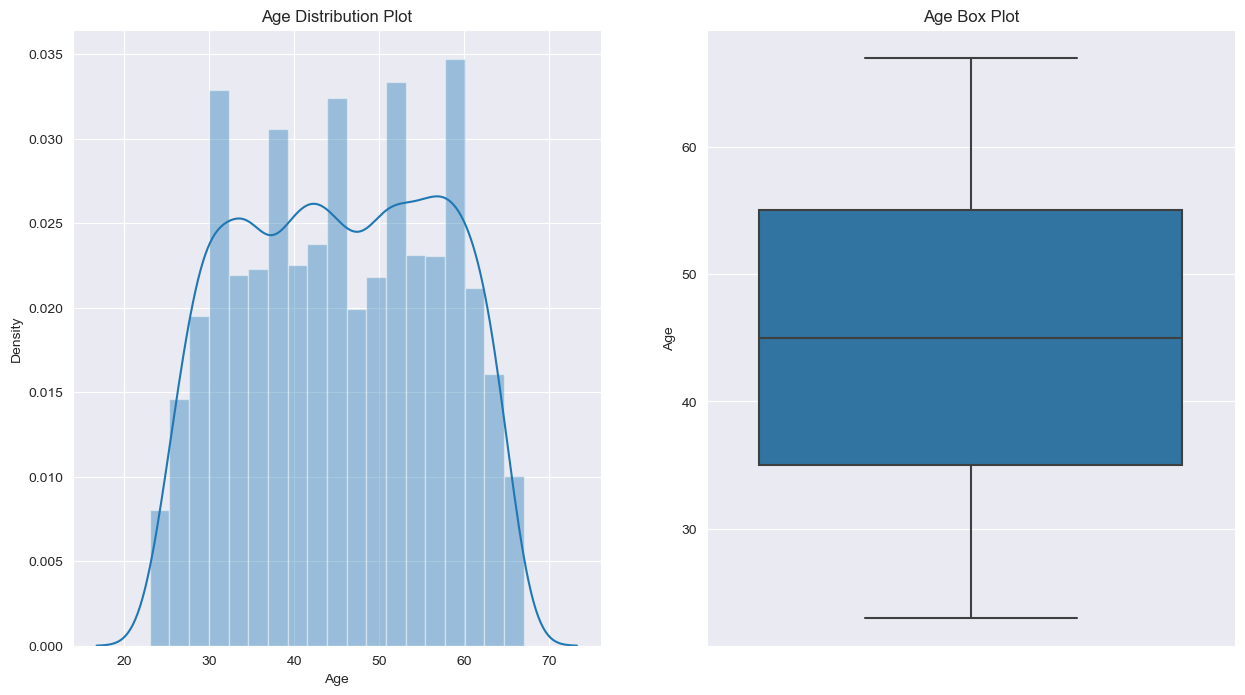

In [10]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Age Distribution Plot')
sns.distplot(df.Age)

plt.subplot(1,2,2)
plt.title('Age Box Plot')
sns.boxplot(y=df.Age)

plt.show()

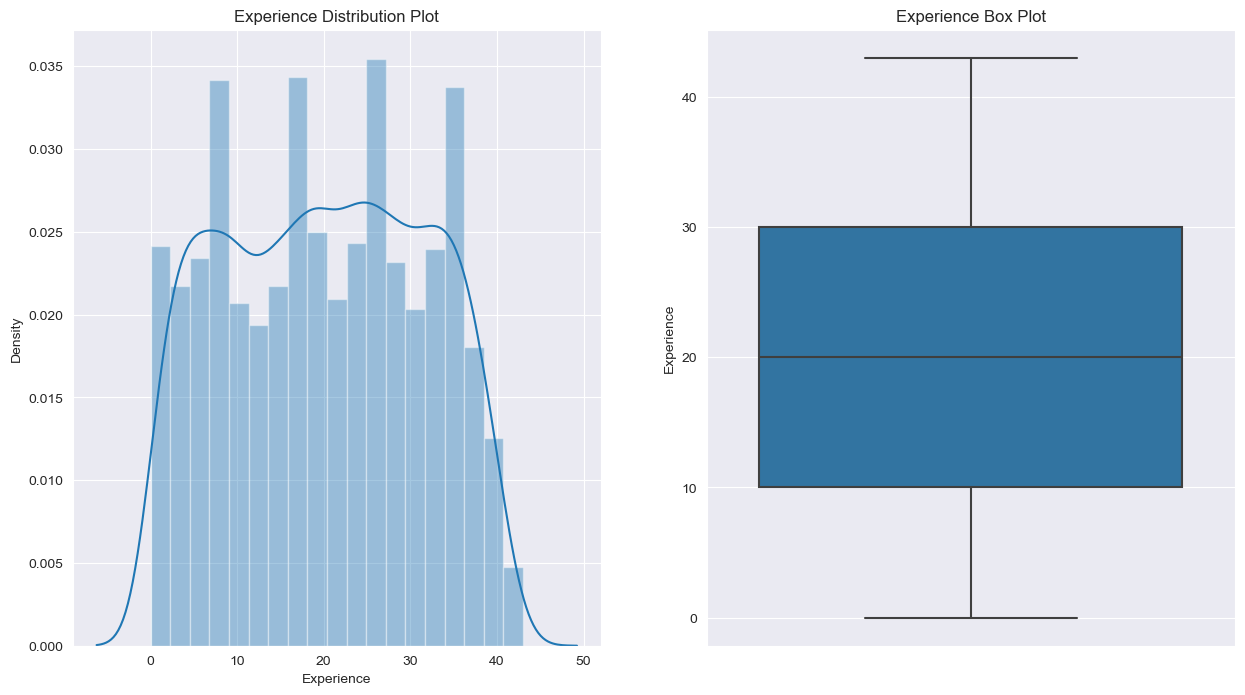

In [11]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Experience Distribution Plot')
sns.distplot(df.Experience)

plt.subplot(1,2,2)
plt.title('Experience Box Plot')
sns.boxplot(y=df.Experience)

plt.show()

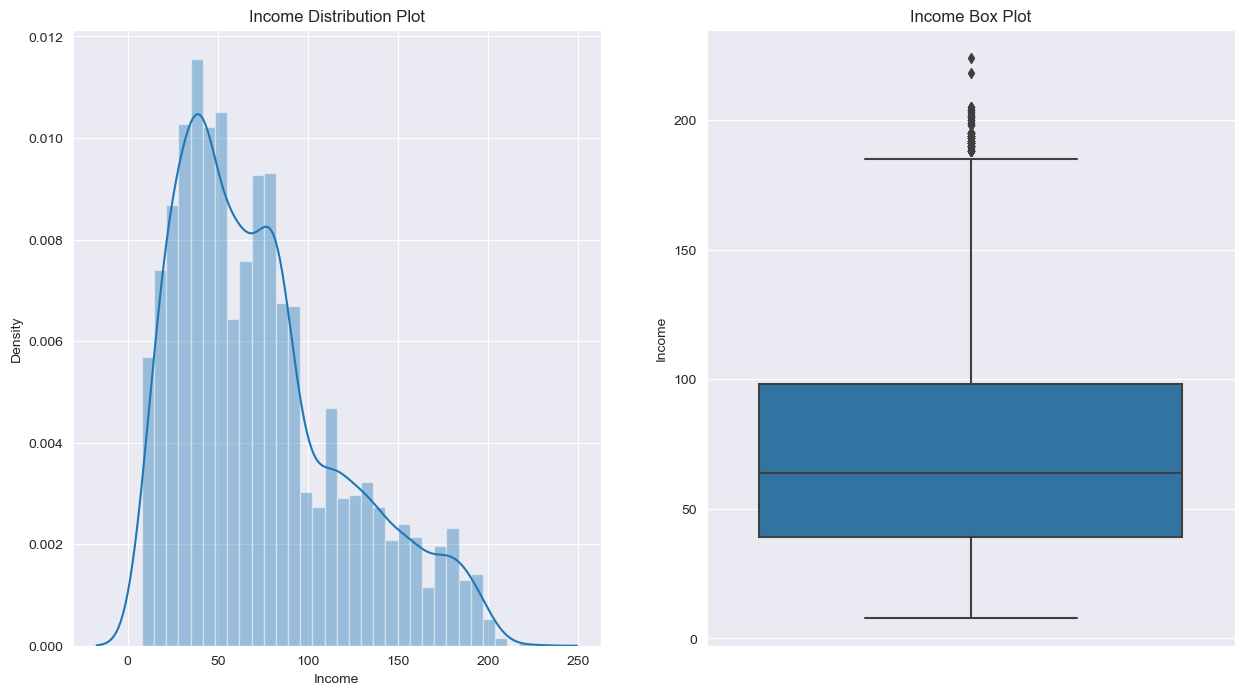

In [12]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Income Distribution Plot')
sns.distplot(df.Income)

plt.subplot(1,2,2)
plt.title('Income Box Plot')
sns.boxplot(y=df.Income)

plt.show()

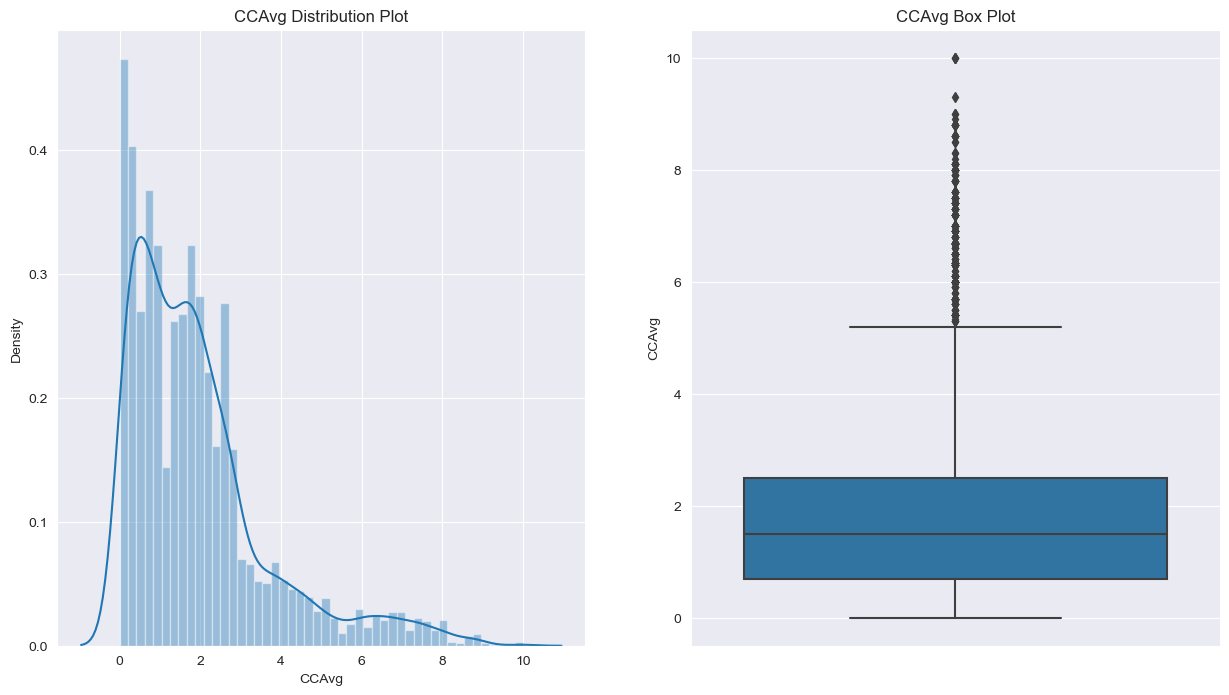

In [13]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('CCAvg Distribution Plot')
sns.distplot(df.CCAvg)

plt.subplot(1,2,2)
plt.title('CCAvg Box Plot')
sns.boxplot(y=df.CCAvg)

plt.show()

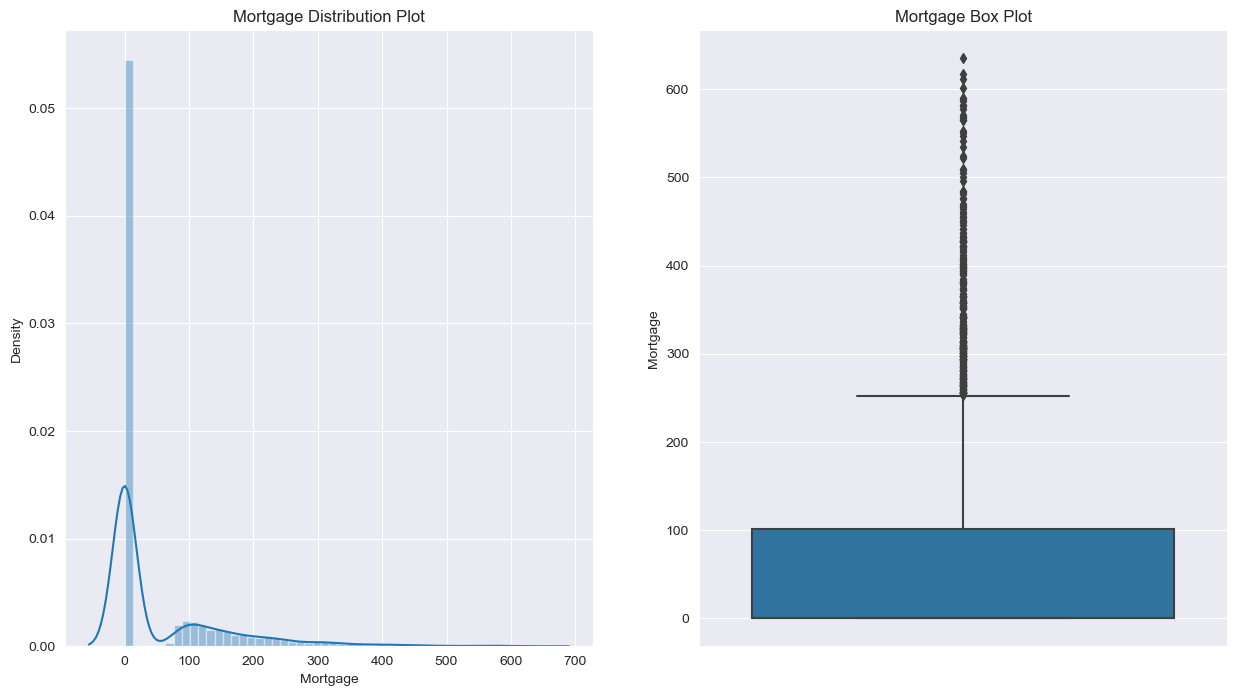

In [14]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Mortgage Distribution Plot')
sns.distplot(df.Mortgage)

plt.subplot(1,2,2)
plt.title('Mortgage Box Plot')
sns.boxplot(y=df.Mortgage)

plt.show()

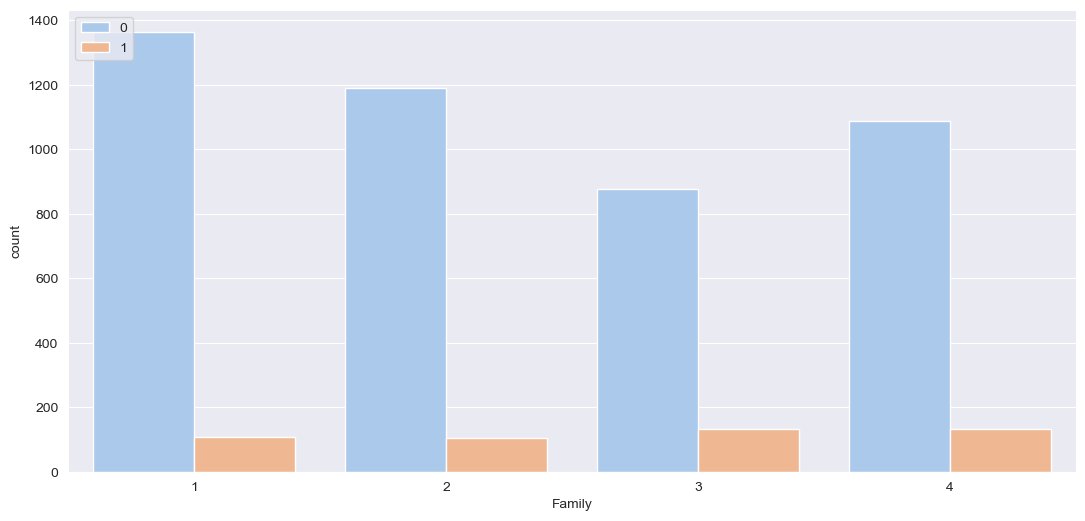

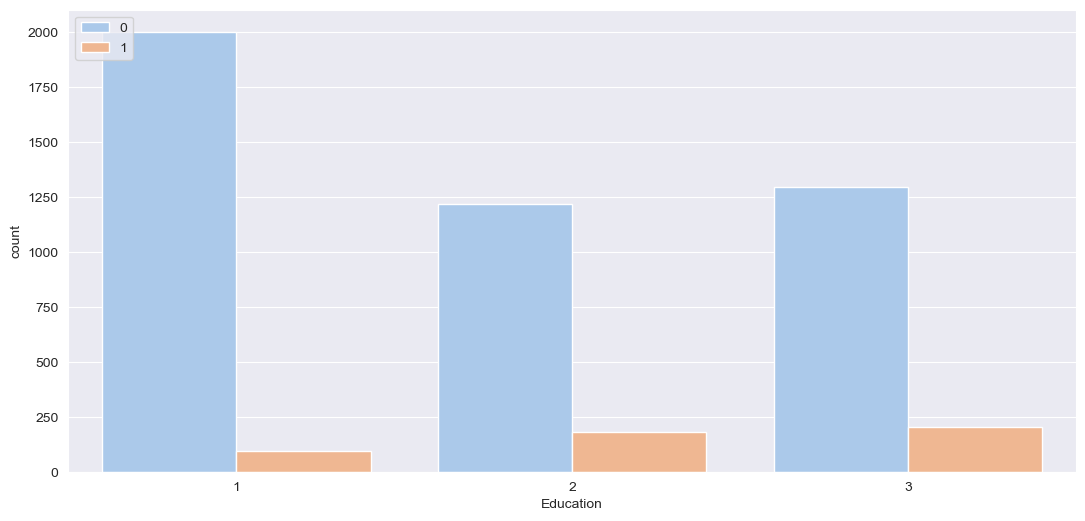

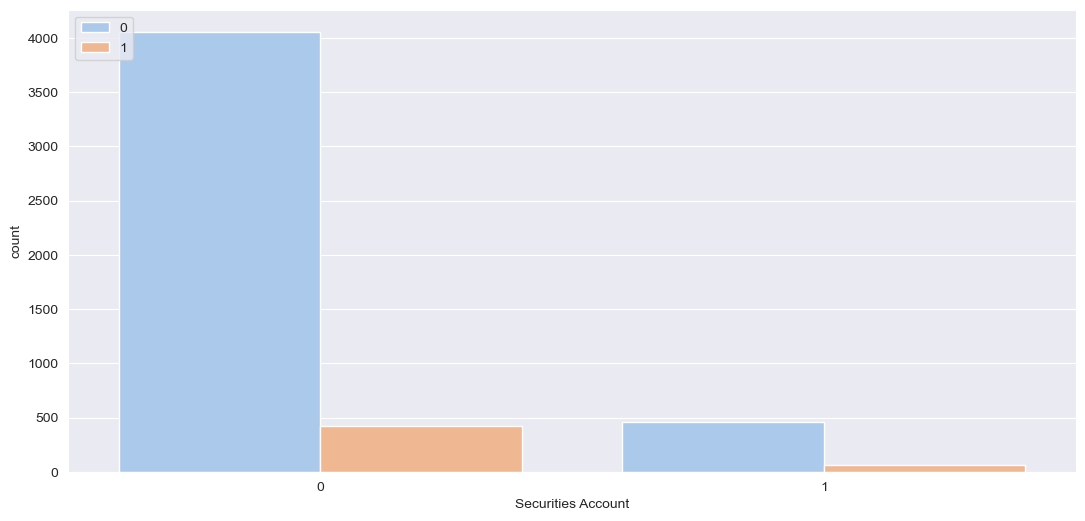

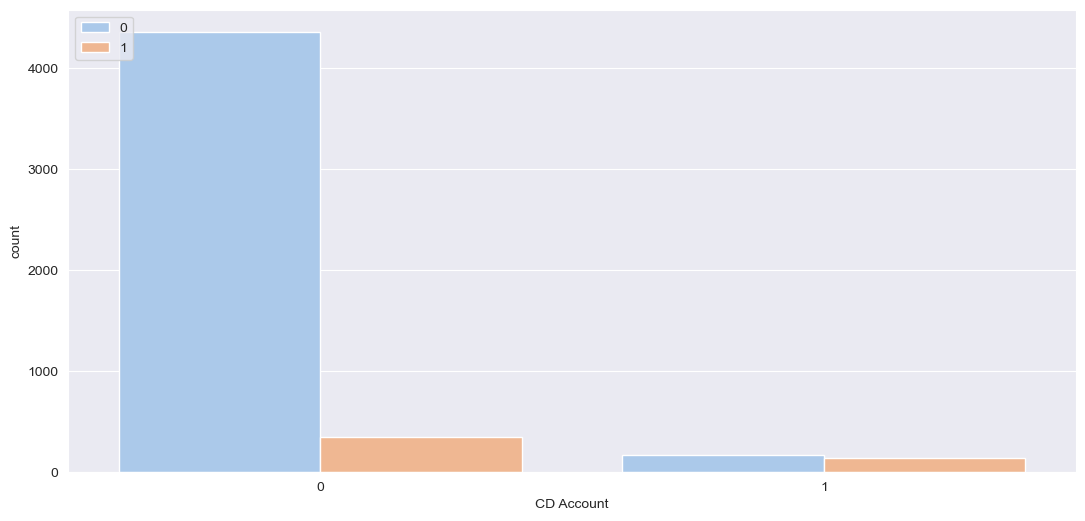

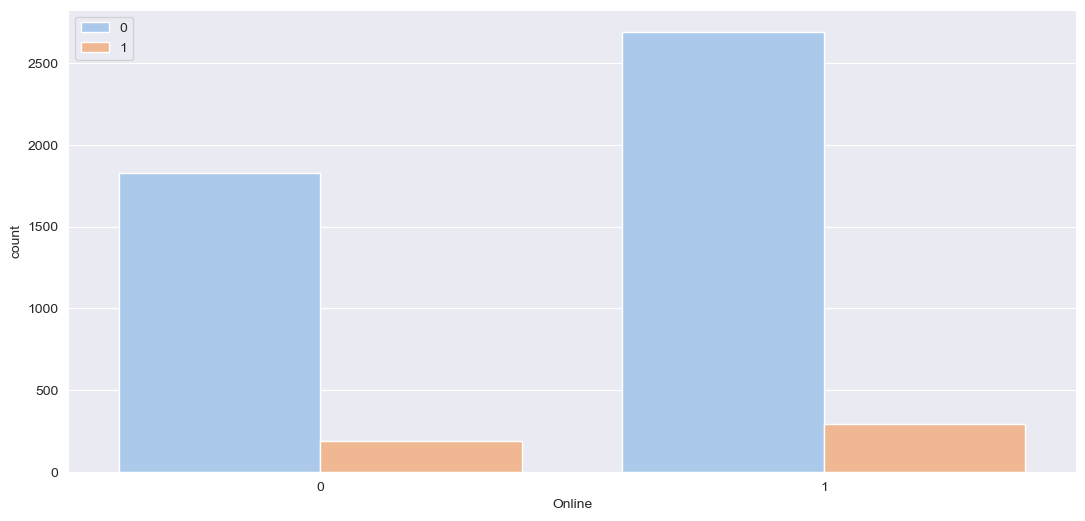

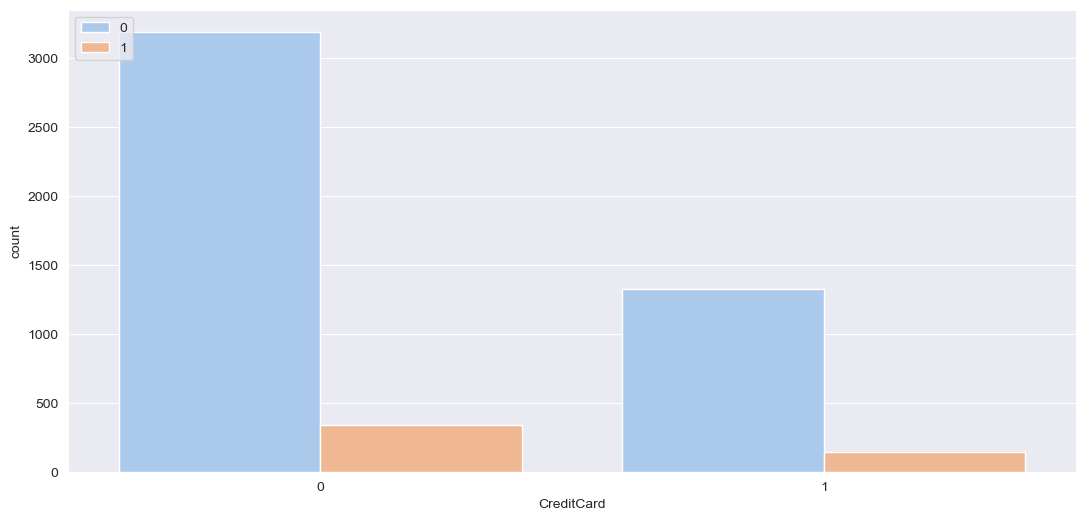

In [15]:
# Categorical columns base on Personal Loan
for col in df_categorical:   
    plt.figure(figsize = (13,6))
    sns.countplot(x = col, hue ="Personal Loan", data=df, palette="pastel") 
    plt.legend(loc='upper left')
    plt.show()

In [16]:
for col in df_categorical:
    fig2 = px.histogram(df,x=col,color=col)
    fig2.show()

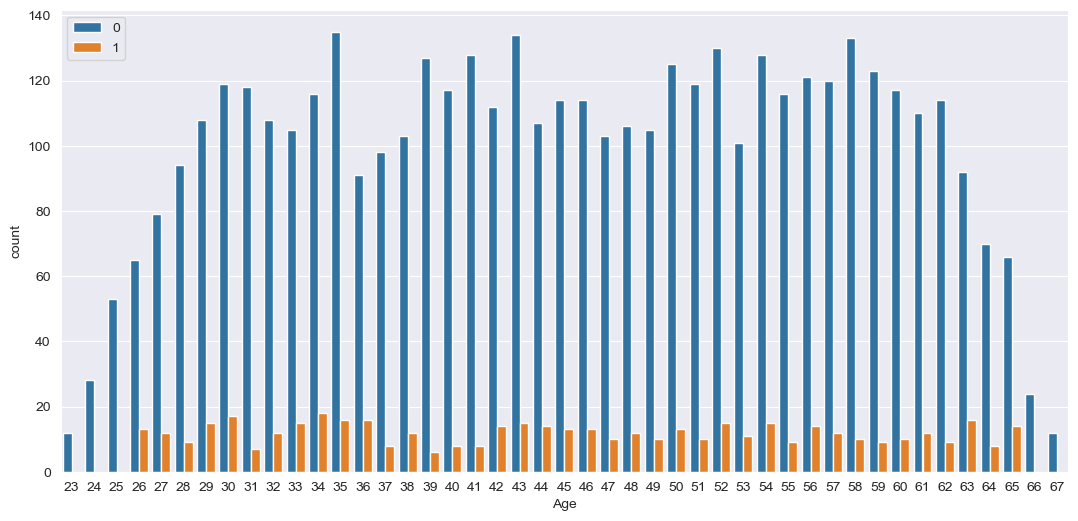

In [17]:
plt.figure(figsize = (13,6))
sns.countplot(x = df.Age, hue ="Personal Loan", data=df) 
plt.legend(loc='upper left')
plt.show()

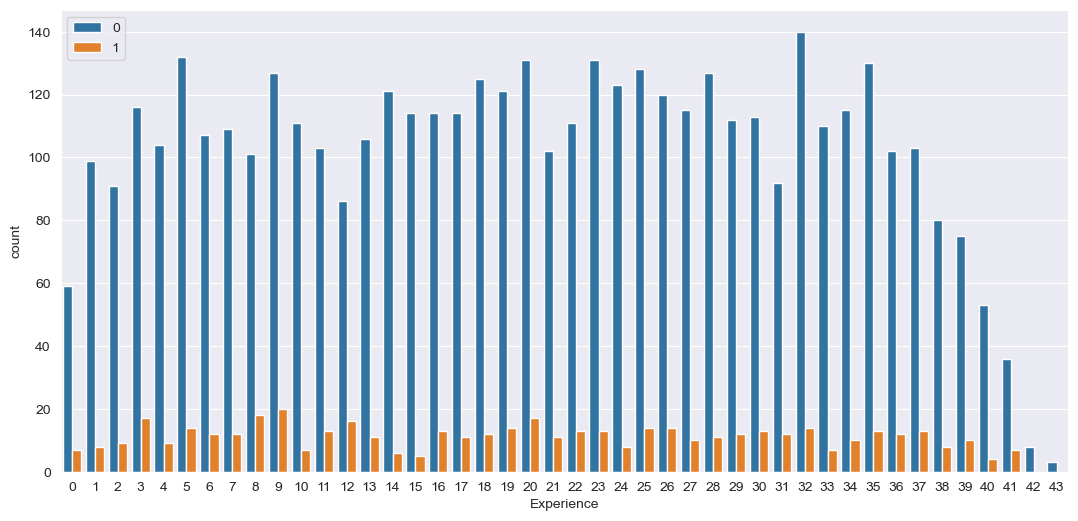

In [18]:
plt.figure(figsize = (13,6))
sns.countplot(x = df.Experience, hue ="Personal Loan", data=df) 
plt.legend(loc='upper left')
plt.show()

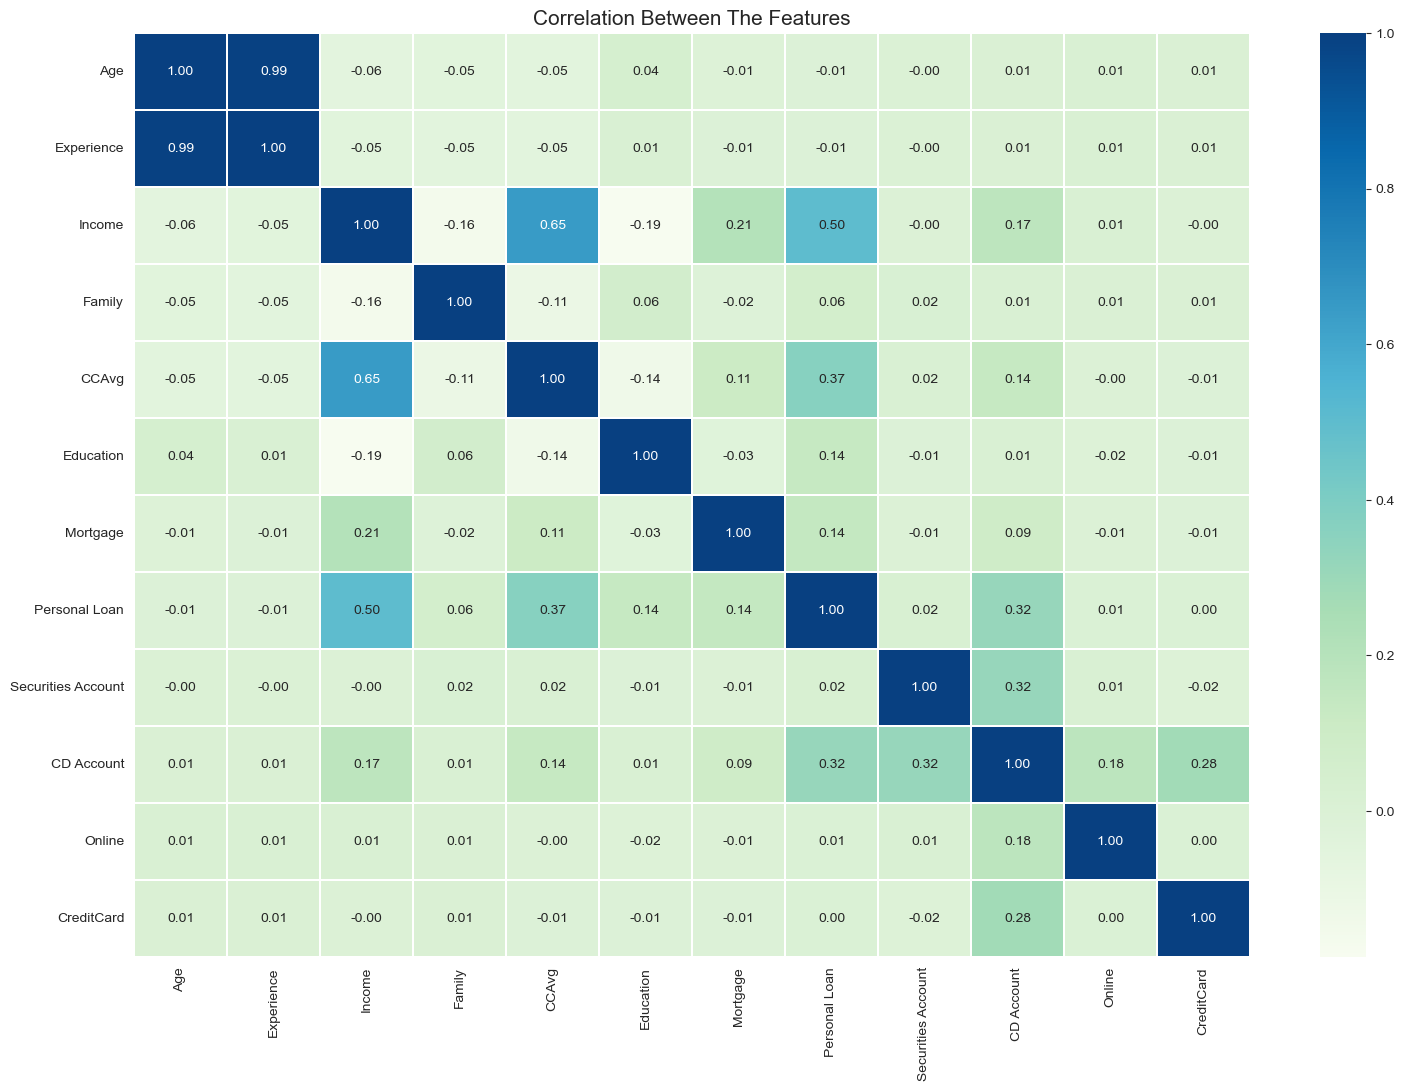

In [19]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features', size=15)
a = sns.heatmap(df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
plt.show()

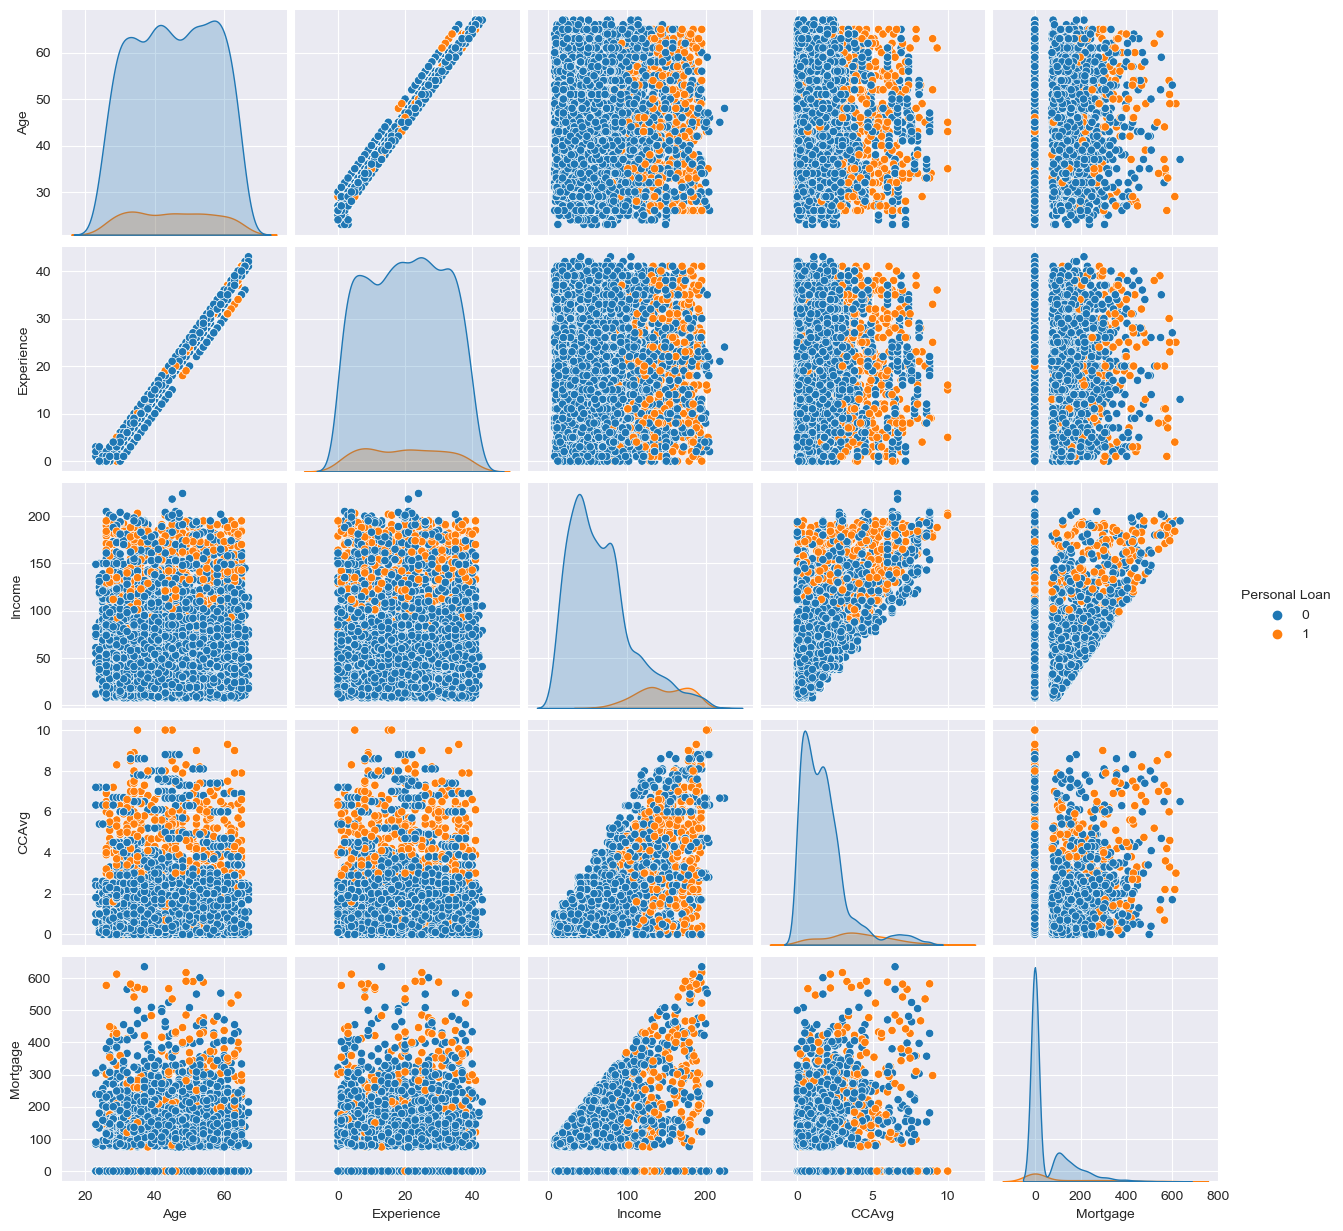

In [21]:
sns.pairplot(data=df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']], 
             hue='Personal Loan');

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p> 

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# KFold
from sklearn.model_selection import KFold

# Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

### Logistic Regression

In [21]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [22]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (5000, 11) 
y: (5000,)


In [23]:
# Array of test size value from 0.2 to 0.35
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

score =[]
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=size, random_state=0)
    logistic = LogisticRegression (solver="newton-cg", C=1, n_jobs=-1, random_state=0)
    logistic.fit (X_train, y_train)
    score.append (logistic.score (X_test, y_test))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r

Test size     Score
0       0.20  0.959000
1       0.25  0.958400
2       0.30  0.953333

In [24]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [25]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [26]:
column = X_train.columns

In [27]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.describe()

Age    Experience        Income        Family         CCAvg  \
count  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03   
mean   6.006307e-17 -1.659228e-16 -1.219025e-16  2.143286e-16  2.144673e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -1.943358e+00 -1.761039e+00 -1.426350e+00 -1.220710e+00 -1.103511e+00   
25%   -8.973469e-01 -8.852923e-01 -7.517522e-01 -1.220710e+00 -7.056331e-01   
50%   -2.567086e-02 -9.545639e-03 -2.077217e-01 -3.493966e-01 -2.509158e-01   
75%    8.460052e-01  8.662010e-01  5.321597e-01  5.219166e-01  3.174808e-01   
max    1.892016e+00  2.004672e+00  3.274073e+00  1.393230e+00  4.580455e+00   

          Education      Mortgage Securities Account    CD Account  \
count  4.000000e+03  4.000000e+03       4.000000e+03  4.000000e+03   
mean   5.105916e-16 -2.882694e-16       1.369183e-16  3.998607e-16   
std    1.000125e+00  1.000125e+00       1.000125e+00  1.000125e+00   
min   -1.035884e+00 -5.543851e-01      -3.384030e-01 -2.487025e-01   
25%   -1.035884e+00 -5.543851e-01      -3.384030e-01 -2.487025e-01   
50%    1.520563e-01 -5.543851e-01      -3.384030e-01 -2.487025e-01   
75%    1.339996e+00  4.292910e-01      -3.384030e-01 -2.487025e-01   
max    1.339996e+00  5.691958e+00       2.955057e+00  4.020868e+00   

             Online    CreditCard  
count  4.000000e+03  4.000000e+03  
mean  -4.690415e-16 -2.492451e-16  
std    1.000125e+00  1.000125e+00  
min   -1.195882e+00 -6.484247e-01  
25%   -1.195882e+00 -6.484247e-01  
50%    8.362029e-01 -6.484247e-01  
75%    8.362029e-01  1.542199e+00  
max    8.362029e-01  1.542199e+00

In [29]:
logistic = LogisticRegression()

In [30]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = logistic.predict(X_test)

In [32]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.9520


In [33]:
print('Training set score: {:.4f}'.format(logistic.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logistic.score(X_test, y_test)))

Training set score: 0.9525
Test set score: 0.9520


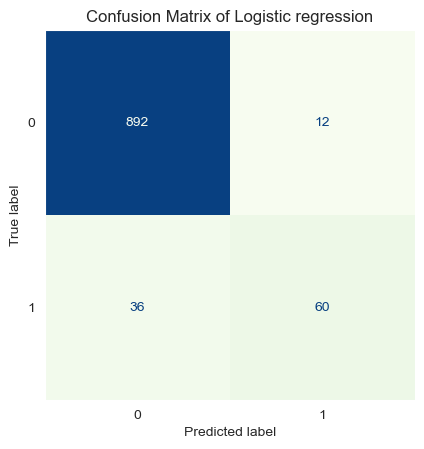

In [34]:
ConfusionMatrixDisplay.from_estimator(logistic, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Logistic regression')
plt.grid(False)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [36]:
# Calculate all performance metrics
def metrics_calculator(y_test, y_pred, model_name):
    
    r = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return r

In [37]:
logistic_r = metrics_calculator(y_test, y_pred, 'Logistic Regression')
logistic_r

Logistic Regression
Accuracy              0.952000
Precision             0.897270
Recall                0.805863
F1-score              0.844042

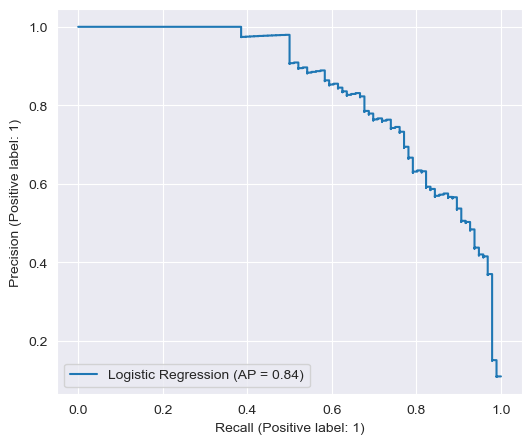

In [38]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(logistic, X_test, y_test, ax=ax, name='Logistic Regression')
plt.show()

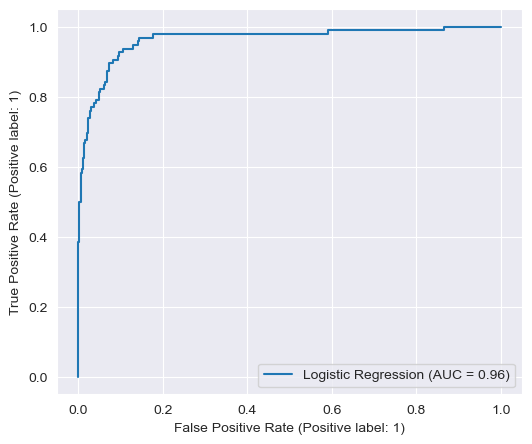

In [39]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(logistic, X_test, y_test, ax=ax, name='Logistic Regression')
plt.show()

In [40]:
# According to GridSearchCV, Best Hyperparameters are: C = 1, penalty = l1, solver = liblinear'
improved_logistic = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
improved_logistic.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [41]:
y_pred = improved_logistic.predict(X_test)

In [42]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9530


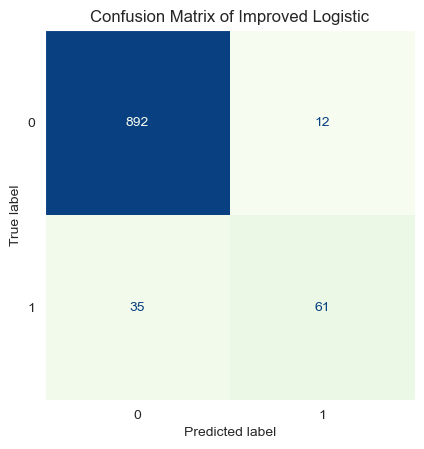

In [43]:
ConfusionMatrixDisplay.from_estimator(improved_logistic, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Improved Logistic')
plt.grid(False)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [45]:
improved_logistic_r = metrics_calculator(y_test, y_pred, 'Improved Logistic Regression')
improved_logistic_r

Improved Logistic Regression
Accuracy                       0.953000
Precision                      0.898930
Recall                         0.811071
F1-score                       0.848112

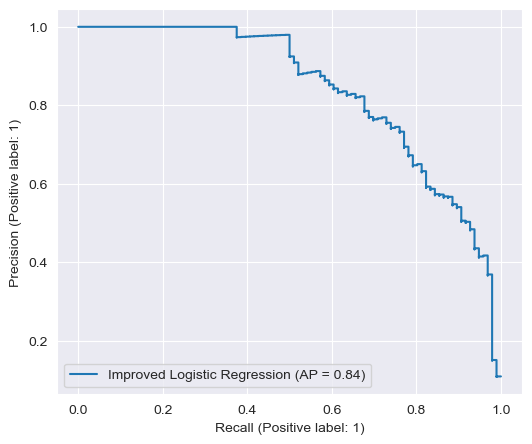

In [46]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(improved_logistic, X_test, y_test, ax=ax, name='Improved Logistic Regression')
plt.show()

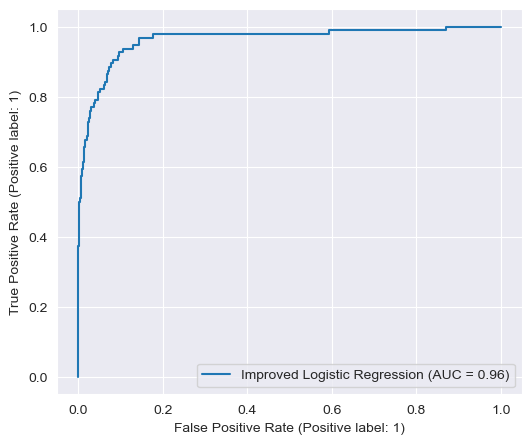

In [47]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(improved_logistic, X_test, y_test, ax=ax, name='Improved Logistic Regression')
plt.show()

### Naive Bayes

#### Gaussian Naive Bayes

In [48]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [49]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (5000, 11) 
y: (5000,)


In [50]:
# Array of test size value from 0.2 to 0.35
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=size, random_state=0)
    gnb = GaussianNB()
    gnb.fit (X_train, y_train)
    score.append (gnb.score (X_test, y_test))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r

Test size   Score
1       0.25  0.8944
0       0.20  0.8920
2       0.30  0.8860

In [51]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 0)

In [52]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3750, 11)
X_test shape: (1250, 11)
y_train shape: (3750,)
y_test shape: (1250,)


In [53]:
column = X_train.columns

In [54]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.describe()

Age   Experience       Income       Family        CCAvg  \
count  3750.000000  3750.000000  3750.000000  3750.000000  3750.000000   
mean      0.504667     0.465674     0.303865     0.465244     0.194732   
std       0.260869     0.265584     0.212903     0.381033     0.175776   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272727     0.232558     0.143519     0.000000     0.070000   
50%       0.500000     0.465116     0.259259     0.333333     0.150000   
75%       0.727273     0.697674     0.416667     0.666667     0.260000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Education     Mortgage Securities Account  CD Account       Online  \
count  3750.000000  3750.000000        3750.000000  3750.00000  3750.000000   
mean      0.434133     0.088686           0.101067     0.05840     0.587733   
std       0.421239     0.160013           0.301457     0.23453     0.492308   
min       0.000000     0.000000           0.000000     0.00000     0.000000   
25%       0.000000     0.000000           0.000000     0.00000     0.000000   
50%       0.500000     0.000000           0.000000     0.00000     1.000000   
75%       1.000000     0.159055           0.000000     0.00000     1.000000   
max       1.000000     1.000000           1.000000     1.00000     1.000000   

        CreditCard  
count  3750.000000  
mean      0.298400  
std       0.457617  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = gnb.predict(X_test)

In [58]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.8856


In [59]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8835
Test set score: 0.8856


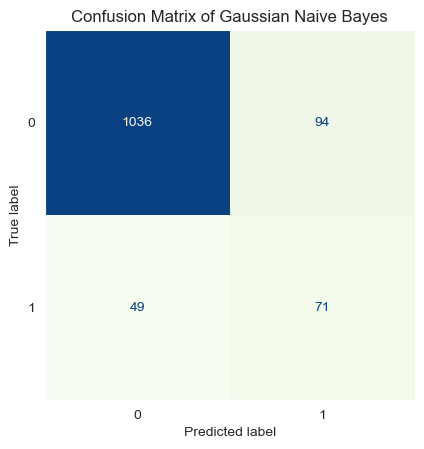

In [60]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.grid(False)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1130
           1       0.43      0.59      0.50       120

    accuracy                           0.89      1250
   macro avg       0.69      0.75      0.72      1250
weighted avg       0.90      0.89      0.89      1250



In [62]:
gnb_r = metrics_calculator(y_test, y_pred, 'Gaussian Naive Bayes')
gnb_r

Gaussian Naive Bayes
Accuracy               0.885600
Precision              0.692571
Recall                 0.754240
F1-score               0.716843

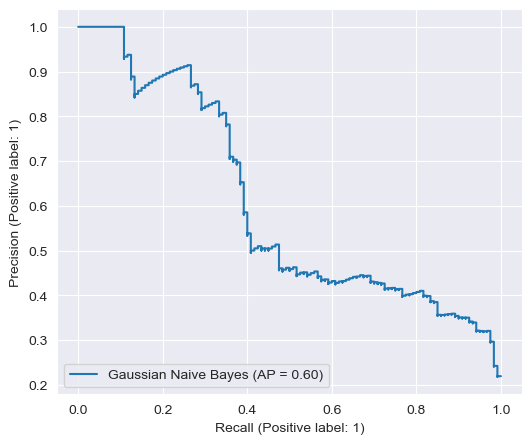

In [63]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test, ax=ax, name='Gaussian Naive Bayes')
plt.show()

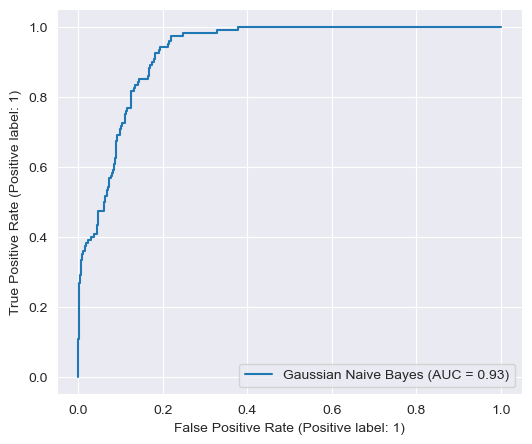

In [64]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(gnb, X_test, y_test, ax=ax, name='Gaussian Naive Bayes')
plt.show()

#### Complement Naive Bayes

In [65]:
# For Convert Continuous Featurs to the Categorical
df2 = df.copy()

In [66]:
df2.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [67]:
# Age
df2['Age'] = pd.cut(df2['Age'],bins=[0,30,45,67],labels=['23-30','31-45','46-67'])

In [68]:
df2.Income.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [69]:
# Income
df2['Income'] = pd.cut(df2['Income'],bins=[0,50,140,224],labels=['Lower','Middle','High'])

In [70]:
df2.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [71]:
# CCAvg
df2['CCAvg'] = pd.cut(df2['CCAvg'],bins=[-1,30,50,120],labels=['Lower','Middle','High'])

In [72]:
df2.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [73]:
# Mortgage
df2['Mortgage'] = pd.cut(df2['Mortgage'],bins=[-1,49,99,149,199,249,299,349,399,700],
                                 labels=['<50','50','100','150','200','250','300','350','>350'])

In [74]:
df2[df2.select_dtypes('int64').columns]=df2.select_dtypes('int64').astype('category')
df2 = df2.drop(['Experience'],axis=1)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   category
 1   Income              5000 non-null   category
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   category
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   category
 6   Personal Loan       5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(11)
memory usage: 55.5 KB


In [76]:
df3=pd.get_dummies(df2.drop('Personal Loan',axis=1),drop_first=True)
df3.insert(0,'Personal_Loan',df2['Personal Loan'])
df3=df3.astype('int64')
df3

Personal_Loan  Age_31-45  Age_46-67  Income_Middle  Income_High  \
0                 0          0          0              0            0   
1                 0          1          0              0            0   
2                 0          1          0              0            0   
3                 0          1          0              1            0   
4                 0          1          0              0            0   
...             ...        ...        ...            ...          ...   
4995              0          0          0              0            0   
4996              0          0          0              0            0   
4997              0          0          1              0            0   
4998              0          0          1              0            0   
4999              0          0          0              1            0   

      Family_2  Family_3  Family_4  CCAvg_Middle  CCAvg_High  ...  \
0            0         0         1             0           0  ...   
1            0         1         0             0           0  ...   
2            0         0         0             0           0  ...   
3            0         0         0             0           0  ...   
4            0         0         1             0           0  ...   
...        ...       ...       ...           ...         ...  ...   
4995         0         0         0             0           0  ...   
4996         0         0         1             0           0  ...   
4997         1         0         0             0           0  ...   
4998         0         1         0             0           0  ...   
4999         0         1         0             0           0  ...   

      Mortgage_150  Mortgage_200  Mortgage_250  Mortgage_300  Mortgage_350  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4995             0             0             0             0             0   
4996             0             0             0             0             0   
4997             0             0             0             0             0   
4998             0             0             0             0             0   
4999             0             0             0             0             0   

      Mortgage_>350  Securities Account_1  CD Account_1  Online_1  \
0                 0                     1             0         0   
1                 0                     1             0         0   
2                 0                     0             0         0   
3                 0                     0             0         0   
4                 0                     0             0         0   
...             ...                   ...           ...       ...   
4995              0                     0             0         1   
4996              0                     0             0         1   
4997              0                     0             0         0   
4998              0                     0             0         1   
4999              0                     0             0         1   

      CreditCard_1  
0                0  
1                0  
2                0  
3                0  
4                1  
...            ...  
4995             0  
4996             0  
4997             0  
4998             0  
4999             1  

[5000 rows x 24 columns]

In [77]:
X = df3.drop('Personal_Loan',axis=1)
y = df3['Personal_Loan'].ravel()

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [79]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

In [80]:
y_pred = cnb.predict(X_test)

In [81]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.8760


In [82]:
print('Training set score: {:.4f}'.format(cnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cnb.score(X_test, y_test)))

Training set score: 0.8560
Test set score: 0.8760


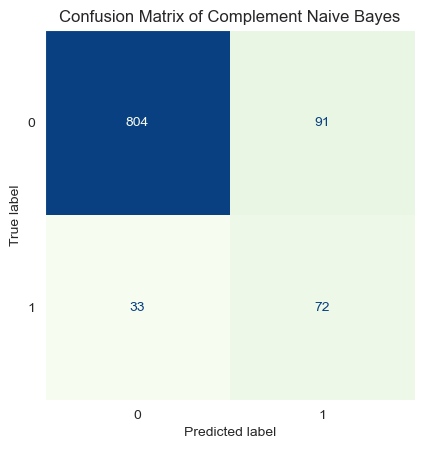

In [83]:
ConfusionMatrixDisplay.from_estimator(cnb, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Complement Naive Bayes')
plt.grid(False)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       895
           1       0.44      0.69      0.54       105

    accuracy                           0.88      1000
   macro avg       0.70      0.79      0.73      1000
weighted avg       0.91      0.88      0.89      1000



In [85]:
cnb_r = metrics_calculator(y_test, y_pred, 'Complement Naive Bayes')
cnb_r

Complement Naive Bayes
Accuracy                 0.876000
Precision                0.701146
Recall                   0.792019
F1-score                 0.732860

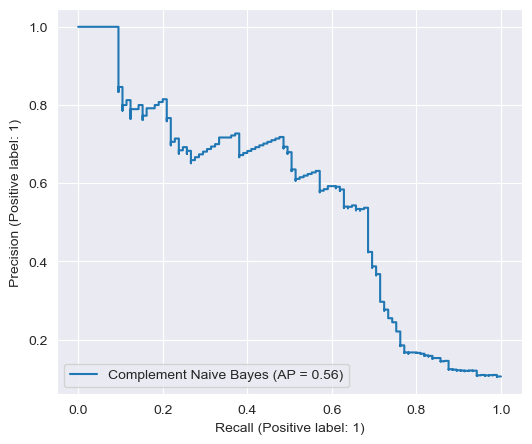

In [86]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(cnb, X_test, y_test, ax=ax, name='Complement Naive Bayes')
plt.show()

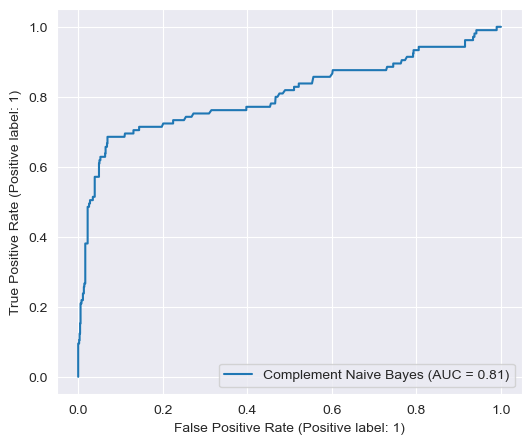

In [87]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(cnb, X_test, y_test, ax=ax, name='Complement Naive Bayes')
plt.show()

### K-Nearest Neighbour

In [88]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [89]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (5000, 11) 
y: (5000,)


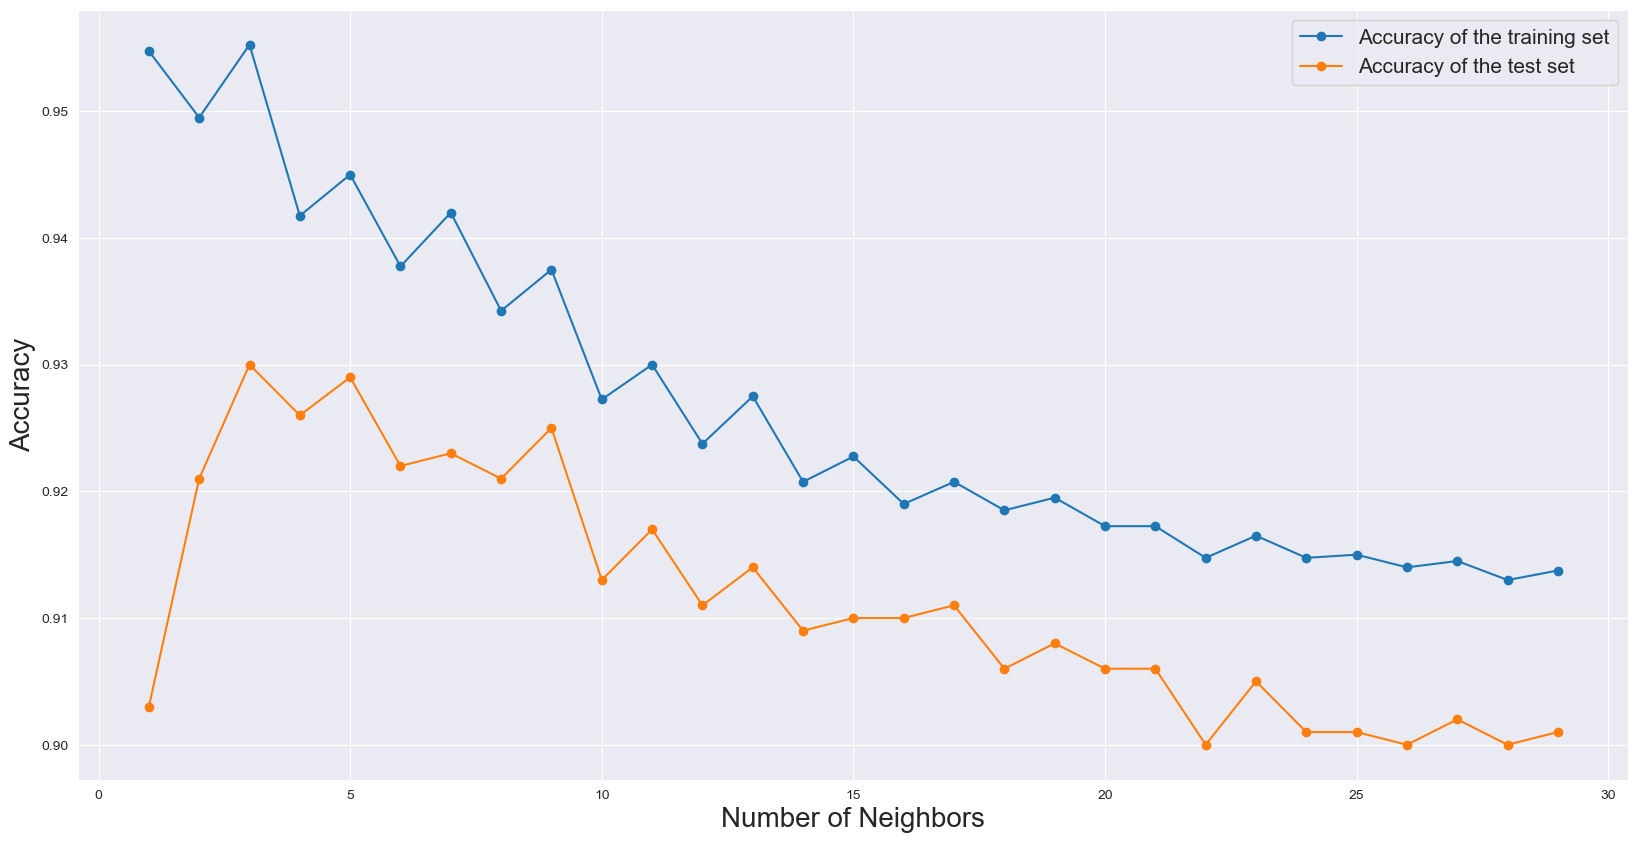

In [90]:
training_acc = []
test_acc = []

# try knn for different k nearest neighbor from 1 to 30

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train.ravel())
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
plt.figure (figsize = (20 , 10), dpi = 100)
plt.plot(neighbors_setting, training_acc, label="Accuracy of the training set", marker = 'o')
plt.plot(neighbors_setting, test_acc, label="Accuracy of the test set", marker = 'o')

plt.ylabel ("Accuracy", fontsize = 20)
plt.xlabel ("Number of Neighbors", fontsize = 20)
plt.legend (fontsize = 15)
plt.show()

In [91]:
# Find the Best K for
K = 31
accuracy = np.zeros ((K))

for i in range (2 , K+1):
    Knn = KNeighborsClassifier (n_neighbors = i)
    Knn.fit (X_train, y_train)
    y_pred = Knn.predict (X_test)
    accuracy [i-1] = metrics.accuracy_score (y_test, y_pred)
print(f'\nBest Accuracy is {max(accuracy)}', "for K =", np.array(accuracy).argmax()+1) 


Best Accuracy is 0.93 for K = 3


In [92]:
K = 3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

score =[]
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=size, random_state=0)
    Knn = KNeighborsClassifier (n_neighbors = K)
    Knn.fit (X_train, y_train)
    score.append (Knn.score (X_test, y_test))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r

Test size     Score
2       0.30  0.920667
0       0.20  0.918000
1       0.25  0.917600

In [93]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.3 , random_state = 0)

In [94]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (3500, 11)
X_test shape:  (1500, 11)
y_train shape:  (3500,)
y_test shape:  (1500,)


In [95]:
column = X_train.columns

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.describe()

Age    Experience        Income        Family         CCAvg  \
count  3.500000e+03  3.500000e+03  3.500000e+03  3.500000e+03  3.500000e+03   
mean  -2.972226e-16  1.016330e-16 -9.015011e-17  3.790619e-17  2.124967e-16   
std    1.000143e+00  1.000143e+00  1.000143e+00  1.000143e+00  1.000143e+00   
min   -1.931947e+00 -1.750942e+00 -1.426476e+00 -1.217367e+00 -1.107121e+00   
25%   -8.854424e-01 -8.742312e-01 -7.515062e-01 -1.217367e+00 -7.084753e-01   
50%   -1.335539e-02  2.479840e-03 -2.071754e-01 -3.438975e-01 -2.244051e-01   
75%    8.587316e-01  7.915198e-01  5.331144e-01  5.295721e-01  3.735638e-01   
max    1.905236e+00  2.018915e+00  3.276542e+00  1.403042e+00  4.587821e+00   

          Education      Mortgage Securities Account    CD Account  \
count  3.500000e+03  3.500000e+03       3.500000e+03  3.500000e+03   
mean   1.568269e-16  2.037101e-16      -1.288810e-16  3.434871e-16   
std    1.000143e+00  1.000143e+00       1.000143e+00  1.000143e+00   
min   -1.033620e+00 -5.501805e-01      -3.364990e-01 -2.487834e-01   
25%   -1.033620e+00 -5.501805e-01      -3.364990e-01 -2.487834e-01   
50%    1.521125e-01 -5.501805e-01      -3.364990e-01 -2.487834e-01   
75%    1.337845e+00  4.328815e-01      -3.364990e-01 -2.487834e-01   
max    1.337845e+00  5.692264e+00       2.971777e+00  4.019560e+00   

             Online    CreditCard  
count  3.500000e+03  3.500000e+03  
mean  -2.335592e-16  1.952724e-16  
std    1.000143e+00  1.000143e+00  
min   -1.192537e+00 -6.537631e-01  
25%   -1.192537e+00 -6.537631e-01  
50%    8.385482e-01 -6.537631e-01  
75%    8.385482e-01  1.529606e+00  
max    8.385482e-01  1.529606e+00

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred = knn.predict(X_test)

In [100]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9667


In [101]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9754
Test set score: 0.9667


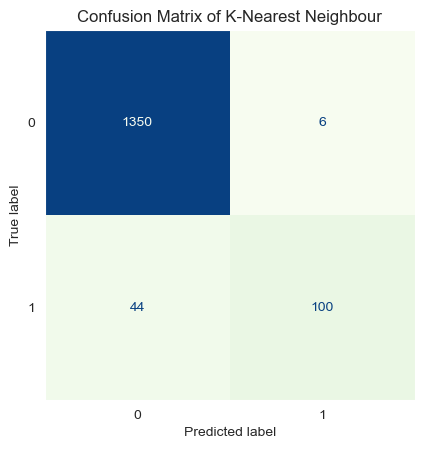

In [102]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of K-Nearest Neighbour')
plt.grid(False)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.94      0.69      0.80       144

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.89      1500
weighted avg       0.97      0.97      0.96      1500



In [104]:
knn_r = metrics_calculator(y_test, y_pred, 'K-Nearest Neighbour')
knn_r

K-Nearest Neighbour
Accuracy              0.966667
Precision             0.955916
Recall                0.845010
F1-score              0.890909

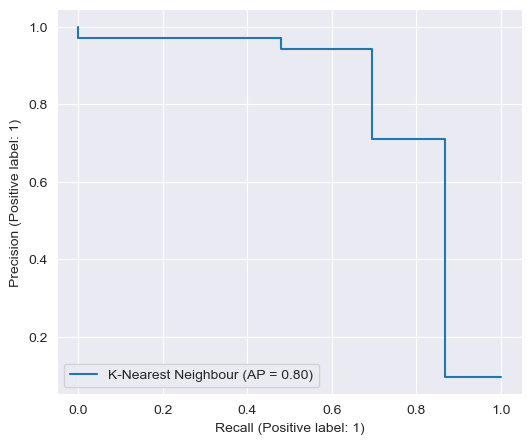

In [105]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(knn, X_test, y_test, ax=ax, name='K-Nearest Neighbour')
plt.show()

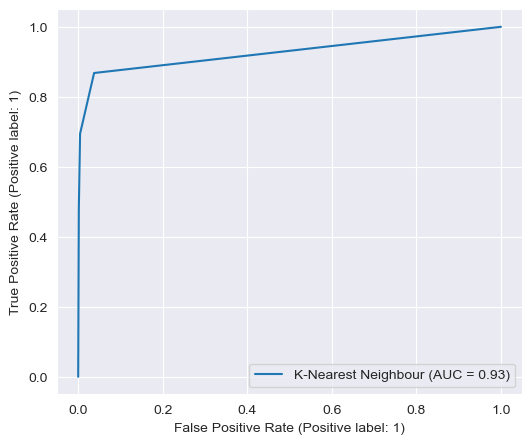

In [106]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, name='K-Nearest Neighbour')
plt.show()

In [107]:
# According to GridSearchCV, Best Hyperparameters: metric = euclidean, n_neighbors = 4, weights = distance}
improved_knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 4, weights= 'distance')
improved_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [108]:
y_pred = improved_knn.predict(X_test)

In [109]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9680


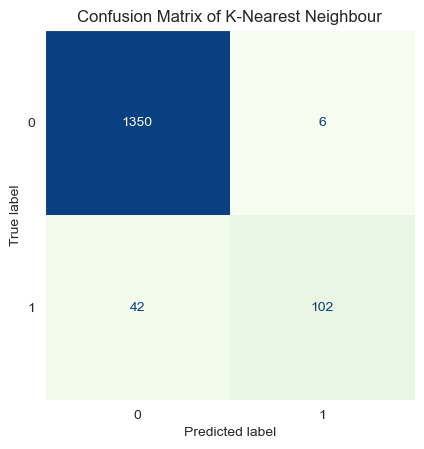

In [110]:
ConfusionMatrixDisplay.from_estimator(improved_knn, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of K-Nearest Neighbour')
plt.grid(False)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.94      0.71      0.81       144

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [112]:
improved_knn_r = metrics_calculator(y_test, y_pred, 'Improved K-Nearest Neighbour')
improved_knn_r

Improved K-Nearest Neighbour
Accuracy                       0.968000
Precision                      0.957136
Recall                         0.851954
F1-score                       0.896028

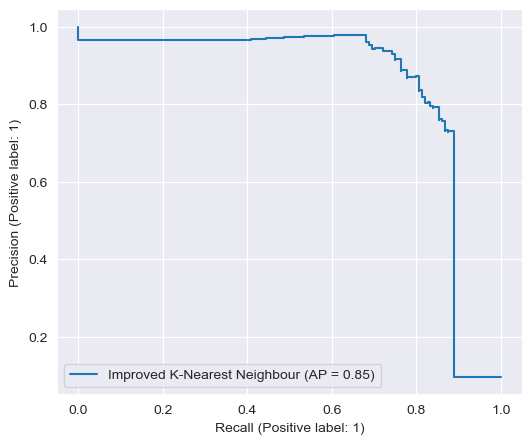

In [113]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(improved_knn, X_test, y_test, ax=ax, name='Improved K-Nearest Neighbour')
plt.show()

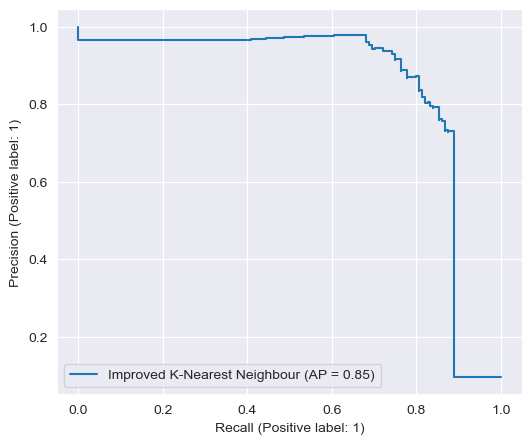

In [114]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(improved_knn, X_test, y_test, ax=ax, name='Improved K-Nearest Neighbour')
plt.show()

### Random Forest

In [115]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [116]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (5000, 11) 
y: (5000,)


In [117]:
# Array of test size value from 0.2 to 0.35
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=size, random_state=42)
    randomf = RandomForestClassifier()
    randomf.fit (X_train, y_train)
    score.append (randomf.score (X_test, y_test))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r

Test size     Score
0       0.20  0.991000
2       0.30  0.988667
1       0.25  0.988000

In [118]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [119]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [120]:
column = X_train.columns

In [121]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.describe()

Age    Experience        Income        Family         CCAvg  \
count  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03   
mean   3.454459e-16  8.498757e-17  1.324496e-16  1.101202e-16 -1.207090e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -1.952463e+00 -1.766585e+00 -1.413775e+00 -1.201969e+00 -1.105276e+00   
25%   -9.078762e-01 -8.931080e-01 -7.660439e-01 -1.201969e+00 -7.026890e-01   
50%   -3.738749e-02 -1.963139e-02 -2.262685e-01 -3.320800e-01 -2.425901e-01   
75%    8.331013e-01  8.538452e-01  5.294172e-01  5.378086e-01  3.325336e-01   
max    1.877688e+00  1.989365e+00  3.249886e+00  1.407697e+00  4.645961e+00   

          Education      Mortgage Securities Account    CD Account  \
count  4.000000e+03  4.000000e+03       4.000000e+03  4.000000e+03   
mean   1.646461e-16 -4.000134e-16      -3.006484e-16  1.701139e-16   
std    1.000125e+00  1.000125e+00       1.000125e+00  1.000125e+00   
min   -1.046917e+00 -5.539094e-01      -3.406926e-01 -2.559885e-01   
25%   -1.046917e+00 -5.539094e-01      -3.406926e-01 -2.559885e-01   
50%    1.407370e-01 -5.539094e-01      -3.406926e-01 -2.559885e-01   
75%    1.328391e+00  4.357756e-01      -3.406926e-01 -2.559885e-01   
max    1.328391e+00  5.730590e+00       2.935198e+00  3.906426e+00   

             Online    CreditCard  
count  4.000000e+03  4.000000e+03  
mean   1.535799e-15  1.959544e-16  
std    1.000125e+00  1.000125e+00  
min   -1.222197e+00 -6.398775e-01  
25%   -1.222197e+00 -6.398775e-01  
50%    8.181987e-01 -6.398775e-01  
75%    8.181987e-01  1.562799e+00  
max    8.181987e-01  1.562799e+00

In [123]:
randomf = RandomForestClassifier()  # max_features close to square root of total attributes or columns
randomf = randomf.fit(X_train,y_train.ravel())

In [124]:
y_pred = randomf.predict(X_test)

In [125]:
print(randomf.score(X_test,y_test))

0.994


In [126]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.9940


In [127]:
print('Training set score: {:.4f}'.format(randomf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(randomf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9940


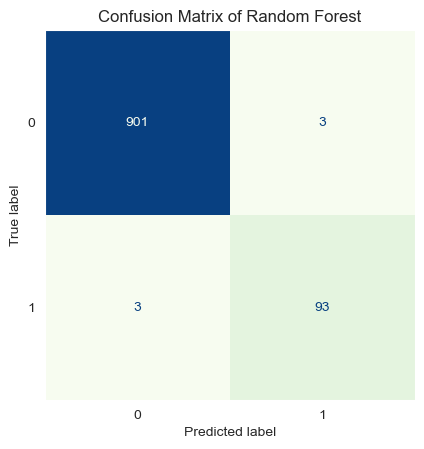

In [128]:
ConfusionMatrixDisplay.from_estimator(randomf, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Random Forest')
plt.grid(False)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.97      0.97      0.97        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [130]:
randomf_r = metrics_calculator(y_test, y_pred, 'Random Forest')
randomf_r

Random Forest
Accuracy        0.994000
Precision       0.982716
Recall          0.982716
F1-score        0.982716

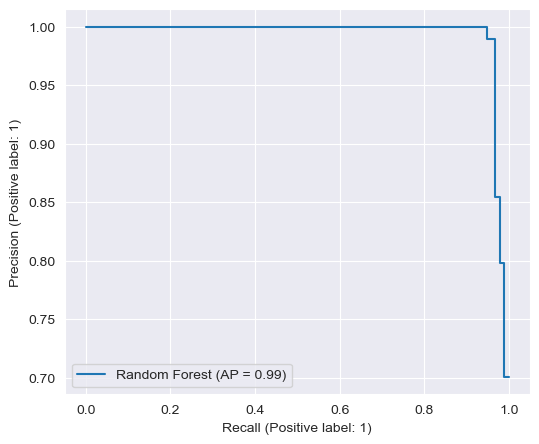

In [131]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(randomf, X_test, y_test, ax=ax, name='Random Forest')
plt.show()

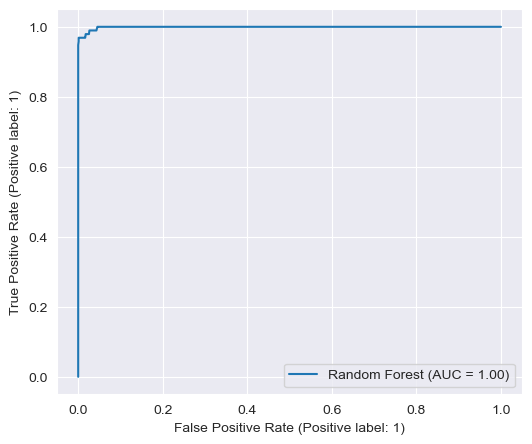

In [132]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(randomf, X_test, y_test, ax=ax, name='Random Forest')
plt.show()

## Cross Validation

In [133]:
kfold_validation=KFold(10)

In [134]:
# Logistic Regression
results1 = cross_val_score(logistic,X,y,cv = kfold_validation)
print(results1)
print(np.mean(results1))

[0.948 0.938 0.942 0.932 0.95  0.958 0.948 0.946 0.964 0.95 ]
0.9475999999999999


In [135]:
# Improved Logistic Regression
results2 = cross_val_score(improved_logistic,X,y,cv = kfold_validation)
print(results2)
print(np.mean(results2))

[0.954 0.948 0.946 0.944 0.954 0.952 0.96  0.942 0.962 0.952]
0.9513999999999999


In [136]:
# Gaussian Naive Bayes
results3 = cross_val_score(gnb, X, y,cv = kfold_validation)
print(results3)
print(np.mean(results3))

[0.894 0.856 0.892 0.872 0.892 0.886 0.888 0.88  0.878 0.894]
0.8832000000000001


In [137]:
# Complement Naive Bayes
results4 = cross_val_score(cnb, X, y,cv = kfold_validation)
print(results4)
print(np.mean(results4))

[0.774 0.702 0.734 0.734 0.722 0.726 0.722 0.744 0.744 0.768]
0.7369999999999999


In [138]:
# KNN
results5=cross_val_score(knn,X,y,cv=kfold_validation)
print(results5)
print(np.mean(results5))

[0.902 0.912 0.898 0.912 0.908 0.916 0.9   0.92  0.912 0.924]
0.9104000000000001


In [139]:
# Improved KNN
results6=cross_val_score(improved_knn,X,y,cv=kfold_validation)
print(results6)
print(np.mean(results6))

[0.902 0.914 0.898 0.912 0.916 0.916 0.904 0.924 0.908 0.928]
0.9122000000000001


In [140]:
# Random Forest
results7=cross_val_score(randomf, X, y, cv=kfold_validation)
print(results7)
print(np.mean(results7))

[0.988 0.988 0.982 0.986 0.982 0.986 0.996 0.992 0.992 0.99 ]
0.9882


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Ensemble Learning</p> 

In [141]:
# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

In [142]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [143]:
print ('X:' , X.shape,'\ny:',y.shape)

X: (5000, 11) 
y: (5000,)


In [144]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.2 , random_state = 0)

In [145]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4000, 11)
X_test shape:  (1000, 11)
y_train shape:  (4000,)
y_test shape:  (1000,)


In [146]:
column = X_train.columns

In [147]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.describe()

Age   Experience       Income       Family        CCAvg  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.506693     0.467651     0.303451     0.467000     0.194144   
std       0.260763     0.265587     0.212773     0.382612     0.175955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272727     0.232558     0.143519     0.000000     0.070000   
50%       0.500000     0.465116     0.259259     0.333333     0.150000   
75%       0.727273     0.697674     0.416667     0.666667     0.250000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Education     Mortgage Securities Account   CD Account       Online  \
count  4000.000000  4000.000000         4000.00000  4000.000000  4000.000000   
mean      0.436000     0.088754            0.10275     0.058250     0.588500   
std       0.420949     0.160114            0.30367     0.234245     0.492167   
min       0.000000     0.000000            0.00000     0.000000     0.000000   
25%       0.000000     0.000000            0.00000     0.000000     0.000000   
50%       0.500000     0.000000            0.00000     0.000000     1.000000   
75%       1.000000     0.157480            0.00000     0.000000     1.000000   
max       1.000000     1.000000            1.00000     1.000000     1.000000   

        CreditCard  
count  4000.000000  
mean      0.296000  
std       0.456548  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

### Voting Classifier

In [149]:
# define the models to include in the ensemble
logistic = LogisticRegression()
improved_logistic = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
gnb = GaussianNB()
cnb = ComplementNB()
knn = KNeighborsClassifier(n_neighbors=3)
improved_knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 4, weights= 'distance')
randomf = RandomForestClassifier() 

# create the ensemble model and fit it on the training set
ensemble_model = VotingClassifier(estimators=[('LG', logistic), ('ILG', improved_logistic), 
                                              ('GNB', gnb), ('CBN', cnb), ('KNN', knn), ('IKNN', improved_knn),
                                              ('RF', randomf)], voting='soft')
ensemble_model.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions1 = ensemble_model.predict(X_test)
accuracy = metrics.accuracy_score(predictions1, y_test)
print('Accuracy of the Ensemble Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the ensemble model
cross_val_scores = cross_val_score(ensemble_model, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Ensemble Model:', cross_val_scores.mean())

Accuracy of the Ensemble Model on the test set: 0.97
Cross-validated Score of the Ensemble Model: 0.9664999999999999


In [150]:
Voting_Classifier_r = metrics_calculator(y_test, predictions1, 'Voting Classifier')
Voting_Classifier_r

Voting Classifier
Accuracy            0.970000
Precision           0.958934
Recall              0.862371
F1-score            0.903568

### Bagging (Bagged KNN)

In [151]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(X_train, y_train)

prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, y_test))

r=cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', r.mean())

The accuracy for bagged KNN is: 0.972
The cross validated score for bagged KNN is: 0.9132


In [152]:
bagging_r = metrics_calculator(y_test, prediction, 'Bagging')
bagging_r

Bagging
Accuracy   0.972000
Precision  0.972102
Recall     0.863477
F1-score   0.909025

### Boosting

#### AdaBoost (Adaptive Boosting)

In [153]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
ada.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions4 = ada.predict(X_test)
accuracy = metrics.accuracy_score(predictions4, y_test)
print('Accuracy of the AdaBoost on the test set:', accuracy)

# calculate and print the mean cross-validated score of the AdaBoost model
cross_val_scores = cross_val_score(ada, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for AdaBoost is:', cross_val_scores.mean())

Accuracy of the AdaBoost on the test set: 0.97
The Cross-validated Score for AdaBoost is: 0.9692500000000001


In [154]:
ada_r = metrics_calculator(y_test, predictions4, 'AdaBoost')
ada_r

AdaBoost
Accuracy   0.970000
Precision  0.964619
Recall     0.857716
F1-score   0.902527

#### Stochastic Gradient Boosting

In [155]:
stoch = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
stoch.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions5 = stoch.predict(X_test)
accuracy = metrics.accuracy_score(predictions5, y_test)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the GradientBoosting model
cross_val_scores = cross_val_score(stoch, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.989
The Cross-validated Score for GradientBoosting is: 0.9872499999999998


In [156]:
stoch_r = metrics_calculator(y_test, predictions5, 'Gradient Boosting')
stoch_r

Gradient Boosting
Accuracy            0.989000
Precision           0.979116
Recall              0.956674
F1-score            0.967555

### XGBoost

In [157]:
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
xgboost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions6 = xgboost.predict(X_test)
accuracy = metrics.accuracy_score(predictions6, y_test)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the XGBoost model
cross_val_scores = cross_val_score(xgboost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.987
The Cross-validated Score for GradientBoosting is: 0.9862500000000001


In [158]:
xgboost_r = metrics_calculator(y_test, predictions6, 'XGBoost')
xgboost_r

XGBoost
Accuracy   0.987000
Precision  0.973071
Recall     0.950913
F1-score   0.961655

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p> 

In [159]:
Conclusion = pd.concat([logistic_r, improved_logistic_r, gnb_r, cnb_r, knn_r, 
                        improved_knn_r, randomf_r, Voting_Classifier_r, bagging_r, ada_r, stoch_r, xgboost_r], axis=1)
Conclusion

Logistic Regression  Improved Logistic Regression  \
Accuracy              0.952000                      0.953000   
Precision             0.897270                      0.898930   
Recall                0.805863                      0.811071   
F1-score              0.844042                      0.848112   

           Gaussian Naive Bayes  Complement Naive Bayes  K-Nearest Neighbour  \
Accuracy               0.885600                0.876000             0.966667   
Precision              0.692571                0.701146             0.955916   
Recall                 0.754240                0.792019             0.845010   
F1-score               0.716843                0.732860             0.890909   

           Improved K-Nearest Neighbour  Random Forest  Voting Classifier  \
Accuracy                       0.968000       0.994000           0.970000   
Precision                      0.957136       0.982716           0.958934   
Recall                         0.851954       0.982716           0.862371   
F1-score                       0.896028       0.982716           0.903568   

            Bagging  AdaBoost  Gradient Boosting   XGBoost  
Accuracy   0.972000  0.970000           0.989000  0.987000  
Precision  0.972102  0.964619           0.979116  0.973071  
Recall     0.863477  0.857716           0.956674  0.950913  
F1-score   0.909025  0.902527           0.967555  0.961655

In [172]:
y_pred_ensemble = stoch.predict(X_test)

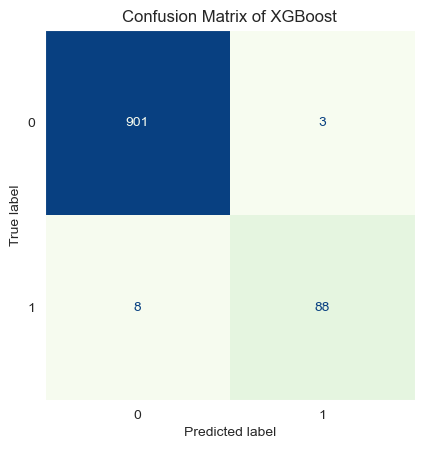

In [173]:
ConfusionMatrixDisplay.from_estimator(stoch, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of XGBoost')
plt.grid(False)

In [174]:
# Tuned Voting Classifier
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.92      0.94        96

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



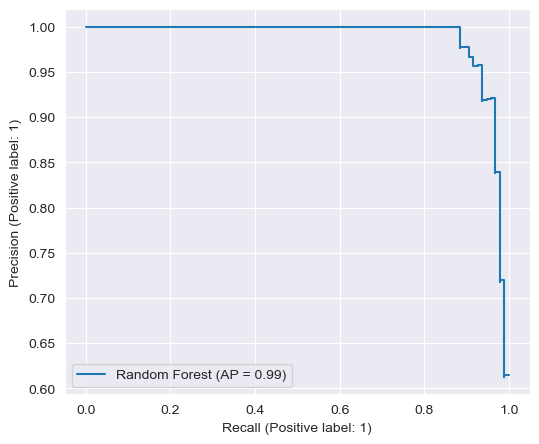

In [175]:
# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
PrecisionRecallDisplay.from_estimator(stoch, X_test, y_test, ax=ax, name='Random Forest')
plt.show()

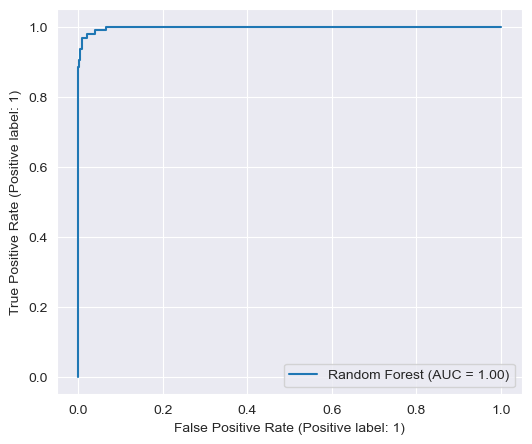

In [176]:
# ROC Curve
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
RocCurveDisplay.from_estimator(stoch, X_test, y_test, ax=ax, name='Random Forest')
plt.show()

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Prediction</p> 

In [177]:
dfnew = df.copy()

In [178]:
dfnew.tail()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1

In [179]:
X_train_sample = dfnew [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                      "Securities Account", "CD Account", "Online", "CreditCard"]][:4999]
y_train_sample = dfnew ["Personal Loan"][:4999].ravel()

In [180]:
X_test_sample = dfnew [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                     "Securities Account", "CD Account", "Online", "CreditCard"]][4999:]
X_test_sample

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  
4999                   0           0       1           1

In [181]:
# Random Forress
randomf = RandomForestClassifier()  
randomf = randomf.fit(X_train,y_train.ravel())

In [182]:
y_pred_sample = randomf.predict(X_test_sample)

In [183]:
print ("Personal Loan Result:", y_pred_sample)

Personal Loan Result: [1]


In [184]:
# Gradient Boosting
stoch = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
stoch.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [185]:
y_pred_sample = randomf.predict(X_test_sample)

In [186]:
print ("Personal Loan Result:", y_pred_sample)

Personal Loan Result: [1]


<div style="background-color:#d5eae9; padding:20px; font-size:15px">

**Tanks for the time you took to observe this notebook** 


**Author: Mohammad Bagher Soroush**